In [ ]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(dplyr)

In [ ]:
object <- readRDS("./RDS/250520.combined_3.4_visium_label_update_hires.rds")

In [ ]:
object

In [ ]:
object$label

In [ ]:
ref <- readRDS("/data/User/revolvefire/projects/3.PPP_231118/231128_PPP/RDS/251115_integrated_total_rawcounts.rds")

In [ ]:
leiden_labels <- ref@meta.data$label2

label_counts <- table(leiden_labels)

print(label_counts)

levels(ref$label3)[levels(ref$label3) == "LC2"] <- "cDC2-2"
levels(ref$label3)[levels(ref$label3) == "cDC2"] <- "cDC2-1"
levels(ref$label3)[levels(ref$label3) == "mLC"] <- "mDC"

In [ ]:
leiden_labels <- ref@meta.data$label3
label_counts <- table(leiden_labels)
print(label_counts)

In [ ]:
ref <- NormalizeData(ref)

In [ ]:
ref <- FindVariableFeatures(ref)

In [ ]:
Idents(ref) <- "label2"

In [ ]:
DimPlot(ref, group.by = "label2", label = TRUE)

In [ ]:
ref@meta.data$label2 <- as.character(ref@meta.data$label2)

ref@meta.data$label2[ref@meta.data$label2 %in% c("BK-1", "BK-2", "BK-3")] <- "BK-1-3"

ref@meta.data$label2[ref@meta.data$label2 %in% c("SBK-1", "SBK-2")] <- "SBK-1-2"

ref@meta.data$label2[ref@meta.data$label2 %in% c("SBK-3", "SBK-4")] <- "SBK-3-4"

In [ ]:
object@meta.data$label <- as.character(object@meta.data$label)
object@meta.data$label[object@meta.data$label %in% c("a/mDC", "pDC", "Mast cell")] <- "Myeloid cell"

In [ ]:
object

In [ ]:
anchors <- FindTransferAnchors(reference = ref, query = object, normalization.method="LogNormalize")
predictions.assay <- TransferData(anchorset = anchors, refdata = ref$label2, prediction.assay = TRUE,
    weight.reduction = object[["pca"]], dims = 1:30)
object[["predictions"]] <- predictions.assay

In [ ]:
data_matrix <- object@assays[["predictions"]]@data
cell_types <- object$label


In [ ]:
row_order <- c("BK-1-3", "SBK-1-2", "SBK-3-4", "SBK-5", "Lymphocyte", "Myeloid cell", "Fibroblast", "Endothelial", "Pericyte")

In [ ]:
col_order <- c('Basal KC','Differentiating KC','Terminally diff KC','Pustular KC','Lymphoid-CCL19+ niche','Myeloid cell', 'Inflammatory Fib/Mac','Fibroblast', 'Endo/Peri', "Neutrophilic pustule", "Eccrine gland coil", "Eccrine gland duct", "Adipocyte" )

In [ ]:
data_matrix <- object@assays[["predictions"]]@data
data_matrix <- data_matrix[rownames(data_matrix) != "max", ]

cell_types <- object$label
cell_ids <- colnames(data_matrix)
cell_ids_by_type <- split(cell_ids, cell_types[cell_ids])

sum_values <- matrix(NA, nrow = nrow(data_matrix), ncol = length(unique(cell_types)))
colnames(sum_values) <- unique(cell_types)
for (cell_type in unique(cell_types)) {
  selected_columns <- cell_ids_by_type[[cell_type]]
  sum_values[, cell_type] <- rowSums(data_matrix[, selected_columns, drop = FALSE])
}
rownames(sum_values) <- rownames(data_matrix)

min_max_standarize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

data <- t(apply(sum_values, 1, min_max_standarize))
data_df <- as.data.frame(data)
colnames(data_df) <- colnames(sum_values)
rownames(data_df) <- rownames(sum_values)

In [ ]:
rownames(sum_values) 
colnames(sum_values)  

In [ ]:
data_df <- data_df[row_order, col_order, drop=FALSE]

In [ ]:
library(pheatmap)
library(viridis)

In [ ]:
pheatmap(t(data_df), 
                   color = plasma(300), 
                   cluster_rows = FALSE, 
                   cluster_cols = FALSE,
                   show_rownames = TRUE,          
                   show_colnames = TRUE,
                   fontsize = 15,   
                   angle_col = "90")

In [ ]:
ht <- pheatmap(
  t(data_df),
  color         = plasma(300),
  cluster_rows  = FALSE,
  cluster_cols  = FALSE,
  show_rownames = TRUE,
  show_colnames = TRUE,
  fontsize  = 15,
  angle_col     = 90,     
  silent        = TRUE    
)

ggsave(
  filename = "./revision_figure/251115_correlation_heatmap_bulk_nomelanocyte.svg",
  plot     = ht,   
  device   = "svg",       
  width    = 5.5,           
  height   = 4
)

### fine

In [ ]:
object <- readRDS("./RDS/250520.combined_3.4_visium_label_update_hires.rds")

In [ ]:
object

In [ ]:
object <- subset(object, idents = c("Neutrophilic pustule", "Eccrine gland coil", "Adipocyte", "Eccrine gland duct"), invert = TRUE)


In [ ]:
ref@meta.data$label3 <- as.character(ref@meta.data$label3)
ref@meta.data$label3[ref@meta.data$label3 %in% c("BK-1", "BK-2", "BK-3")] <- "BK-1-3"
ref@meta.data$label3[ref@meta.data$label3 %in% c("SBK-1", "SBK-2")] <- "SBK-1-2"
ref@meta.data$label3[ref@meta.data$label3 %in% c("SBK-3", "SBK-4")] <- "SBK-3-4"

In [ ]:
anchors <- FindTransferAnchors(reference = ref, query = object, normalization.method="LogNormalize")
predictions.assay <- TransferData(anchorset = anchors, refdata = ref$label3, prediction.assay = TRUE,
    weight.reduction = object[["pca"]], dims = 1:30)
object[["predictions"]] <- predictions.assay

In [ ]:
row_order <- c("BK-1-3", "SBK-1-2", "SBK-3-4", "SBK-5", "Th17", "CD4em", "CD4cm", "Treg", "CD8/NK", "pDC", "mDC", "cDC2-2", 'Mast cell', "cDC2-1", "Macrophage", "Superficial FIB", "FRC-like FIB", "Inf universal FIB", "Universal FIB", "Endothelial", "Pericyte")

In [ ]:
col_order <- c('Basal KC','Differentiating KC','Terminally diff KC','Pustular KC', 'Lymphoid-CCL19+ niche','pDC','a/mDC', 'Mast cell', 'Inflammatory Fib/Mac','Fibroblast', 'Endo/Peri')

In [ ]:
data_matrix <- object@assays[["predictions"]]@data
data_matrix <- data_matrix[rownames(data_matrix) != "max", ]

cell_types <- object$label
cell_ids <- colnames(data_matrix)
cell_ids_by_type <- split(cell_ids, cell_types[cell_ids])

sum_values <- matrix(NA, nrow = nrow(data_matrix), ncol = length(unique(cell_types)))
colnames(sum_values) <- unique(cell_types)
for (cell_type in unique(cell_types)) {
  selected_columns <- cell_ids_by_type[[cell_type]]
  sum_values[, cell_type] <- rowSums(data_matrix[, selected_columns, drop = FALSE])
}
rownames(sum_values) <- rownames(data_matrix)

min_max_standarize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

data <- t(apply(sum_values, 1, min_max_standarize))
data_df <- as.data.frame(data)
colnames(data_df) <- colnames(sum_values)
rownames(data_df) <- rownames(sum_values)

In [ ]:
colnames(sum_values)

In [ ]:
rownames(sum_values)

In [ ]:
data_df <- data_df[row_order, col_order, drop=FALSE]

In [ ]:
pheatmap(t(data_df), 
                   color = plasma(300), 
                   cluster_rows = FALSE, 
                   cluster_cols = FALSE,
                   show_rownames = TRUE,          
                   show_colnames = TRUE,
                   fontsize = 15,   
                   angle_col = "90")

In [ ]:
ht <- pheatmap(
  t(data_df),
  color         = plasma(300),
  cluster_rows  = FALSE,
  cluster_cols  = FALSE,
  show_rownames = TRUE,
  show_colnames = TRUE,
  fontsize_row  = 15,
  fontsize_col  = 13, 
  angle_col     = 90,     
  silent        = TRUE    
)

ggsave(
  filename = "./revision_figure/251115_correlation_fine_heatmap2.svg",
  plot     = ht,   
  device   = "svg",       
  width    = 7,           
  height   = 4
)

### fine mast 제거, fibroblst는 묶어서

In [90]:
object <- readRDS("./RDS/250520.combined_3.4_visium_label_update_hires.rds")

In [91]:
object

An object of class Seurat 
18085 features across 89472 samples within 1 assay 
Active assay: Spatial.008um (18085 features, 2000 variable features)
 5 layers present: counts.1, counts.2, data.1, data.2, scale.data
 2 dimensional reductions calculated: pca, umap
 2 spatial fields of view present: slide1 slide2

In [92]:
object <- subset(object, idents = c("Neutrophilic pustule", "Eccrine gland coil", "Adipocyte", "Eccrine gland duct"), invert = TRUE)


Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”


In [93]:
ref@meta.data$label3 <- as.character(ref@meta.data$label3)
ref@meta.data$label3[ref@meta.data$label3 %in% c("BK-1", "BK-2", "BK-3")] <- "BK-1-3"
ref@meta.data$label3[ref@meta.data$label3 %in% c("SBK-1", "SBK-2")] <- "SBK-1-2"
ref@meta.data$label3[ref@meta.data$label3 %in% c("SBK-3", "SBK-4")] <- "SBK-3-4"

In [94]:
ref@meta.data$label3[ref@meta.data$label3 %in% c("Superficial FIB", "FRC-like FIB", "Inf universal FIB", "Universal FIB")] <- "Fibroblast"

In [95]:
anchors <- FindTransferAnchors(reference = ref, query = object, normalization.method="LogNormalize")
predictions.assay <- TransferData(anchorset = anchors, refdata = ref$label3, prediction.assay = TRUE,
    weight.reduction = object[["pca"]], dims = 1:30)
object[["predictions"]] <- predictions.assay

Performing PCA on the provided reference using 1728 features as input.

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 4399 anchors

Finding neighborhoods

Finding anchors

	Found 3080 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
“Layer counts isn't present in the assay object; returning NULL”


In [96]:
row_order <- c("BK-1-3", "SBK-1-2", "SBK-3-4", "SBK-5", "Th17", "CD4em", "CD4cm", "Treg", "CD8/NK", "pDC", "mDC", "cDC2-2", "cDC2-1", "Macrophage", "Fibroblast", "Endothelial", "Pericyte")

In [97]:
col_order <- c('Basal KC','Differentiating KC','Terminally diff KC','Pustular KC', 'Lymphoid-CCL19+ niche','pDC','a/mDC', 'Inflammatory Fib/Mac','Fibroblast', 'Endo/Peri')

In [98]:
data_matrix <- object@assays[["predictions"]]@data
data_matrix <- data_matrix[rownames(data_matrix) != "max", ]

cell_types <- object$label
cell_ids <- colnames(data_matrix)
cell_ids_by_type <- split(cell_ids, cell_types[cell_ids])

sum_values <- matrix(NA, nrow = nrow(data_matrix), ncol = length(unique(cell_types)))
colnames(sum_values) <- unique(cell_types)
for (cell_type in unique(cell_types)) {
  selected_columns <- cell_ids_by_type[[cell_type]]
  sum_values[, cell_type] <- rowSums(data_matrix[, selected_columns, drop = FALSE])
}
rownames(sum_values) <- rownames(data_matrix)

min_max_standarize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

data <- t(apply(sum_values, 1, min_max_standarize))
data_df <- as.data.frame(data)
colnames(data_df) <- colnames(sum_values)
rownames(data_df) <- rownames(sum_values)

In [99]:
colnames(sum_values)

[1] "Pustular KC"           "Terminally diff KC"    "Mast cell"            
 [4] "Lymphoid-CCL19+ niche" "Basal KC"              "Inflammatory Fib/Mac" 
 [7] "Differentiating KC"    "Fibroblast"            "pDC"                  
[10] "a/mDC"                 "Endo/Peri"

In [100]:
rownames(sum_values)

[1] "SBK-1-2"          "cDC2-1"           "SBK-3-4"          "Fibroblast"      
 [5] "Th17"             "BK-1-3"           "CD4em"            "mDC"             
 [9] "CD8/NK"           "Endothelial"      "CD4cm"            "Macrophage"      
[13] "cDC2-2"           "pDC"              "Schwann-like FIB" "SBK-5"           
[17] "Pericyte"         "Treg"             "Mast cell"        "Melanocyte"

In [101]:
data_df <- data_df[row_order, col_order, drop=FALSE]

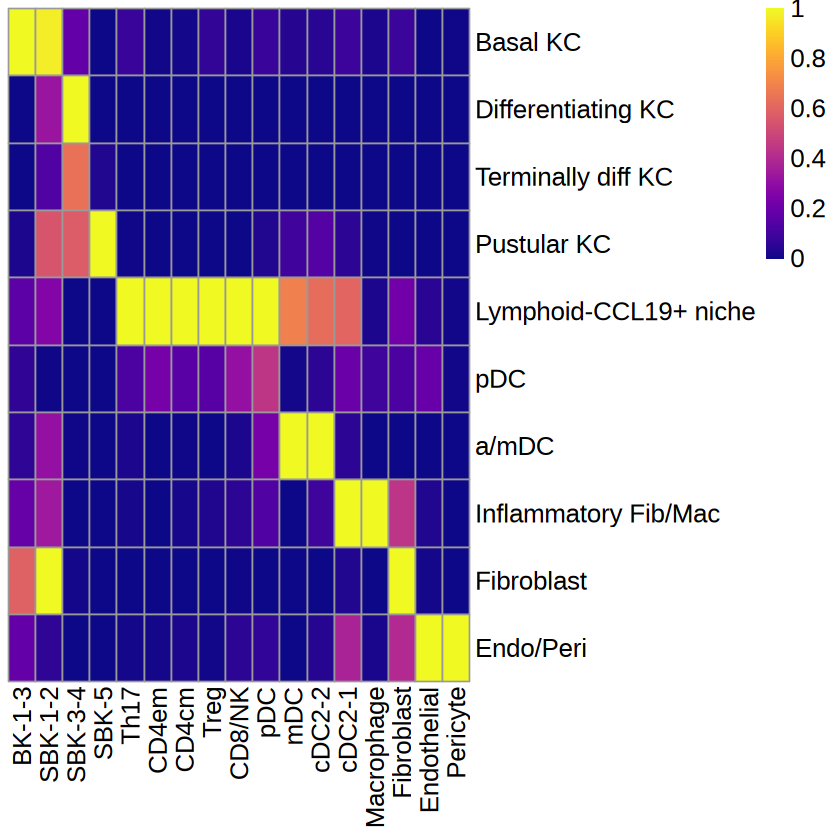

In [102]:
pheatmap(t(data_df), 
                   color = plasma(300), 
                   cluster_rows = FALSE, 
                   cluster_cols = FALSE,
                   show_rownames = TRUE,          
                   show_colnames = TRUE,
                   fontsize = 15,   
                   angle_col = "90")

In [103]:
ht <- pheatmap(
  t(data_df),
  color         = plasma(300),
  cluster_rows  = FALSE,
  cluster_cols  = FALSE,
  show_rownames = TRUE,
  show_colnames = TRUE,
  fontsize_row  = 15,
  fontsize_col  = 13, 
  angle_col     = 90,     
  silent        = TRUE    
)

ggsave(
  filename = "./revision_figure/251115_correlation_fine_heatmap2_mastremoved_fibroblastbulk.svg",
  plot     = ht,   
  device   = "svg",       
  width    = 7,           
  height   = 4
)

### 250531 fine mast 추가 fibroblst는 묶어서

In [60]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(dplyr)

In [61]:
object <- readRDS("./RDS/250520.combined_3.4_visium_label_update_hires.rds")

In [62]:
object

An object of class Seurat 
18085 features across 89472 samples within 1 assay 
Active assay: Spatial.008um (18085 features, 2000 variable features)
 5 layers present: counts.1, counts.2, data.1, data.2, scale.data
 2 dimensional reductions calculated: pca, umap
 2 spatial fields of view present: slide1 slide2

In [63]:
object <- subset(object, idents = c("Neutrophilic pustule", "Eccrine gland coil", "Adipocyte", "Eccrine gland duct"), invert = TRUE)


Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”


In [6]:
ref <- readRDS("/data/User/revolvefire/projects/3.PPP_231118/231128_PPP/RDS/250520_integrated_total_rawcounts_labelupdate.rds")

In [7]:
# Assuming your Seurat object is named 'ref'
# Accessing the leiden2 column
leiden_labels <- ref@meta.data$label2

# Counting occurrences of each label
label_counts <- table(leiden_labels)

# Displaying the counts
print(label_counts)

leiden_labels
        BK-1         BK-2         BK-3        SBK-1        SBK-2        SBK-3 
         964         2068         1181         1452         1586          937 
       SBK-4        SBK-5 Myeloid cell   Lymphocyte   Melanocyte  Endothelial 
        1106           21          365          545           32         1172 
    Pericyte   Fibroblast 
         641          875 


In [8]:
# Assuming your Seurat object is named 'ref'
# Accessing the leiden2 column
leiden_labels <- ref@meta.data$label3

# Counting occurrences of each label
label_counts <- table(leiden_labels)

# Displaying the counts
print(label_counts)

leiden_labels
             BK-1              BK-2              BK-3             CD4em 
              964              2068              1181               128 
             CD4n            CD8/NK       Endothelial      FRC-like FIB 
              130               127              1172               152 
Inf universal FIB            cDC2-2        Macrophage         Mast cell 
              195                57                70                23 
       Melanocyte          Pericyte             SBK-1             SBK-2 
               32               641              1452              1586 
            SBK-3             SBK-4             SBK-5  Schwann-like FIB 
              937              1106                21               128 
  Superficial FIB              Th17     Universal FIB            cDC2-1 
              235               160               165               120 
              mDC               pDC 
               33                62 


In [9]:
ref <- NormalizeData(ref)

In [10]:
ref <- FindVariableFeatures(ref)

In [11]:
Idents(ref) <- "label2"

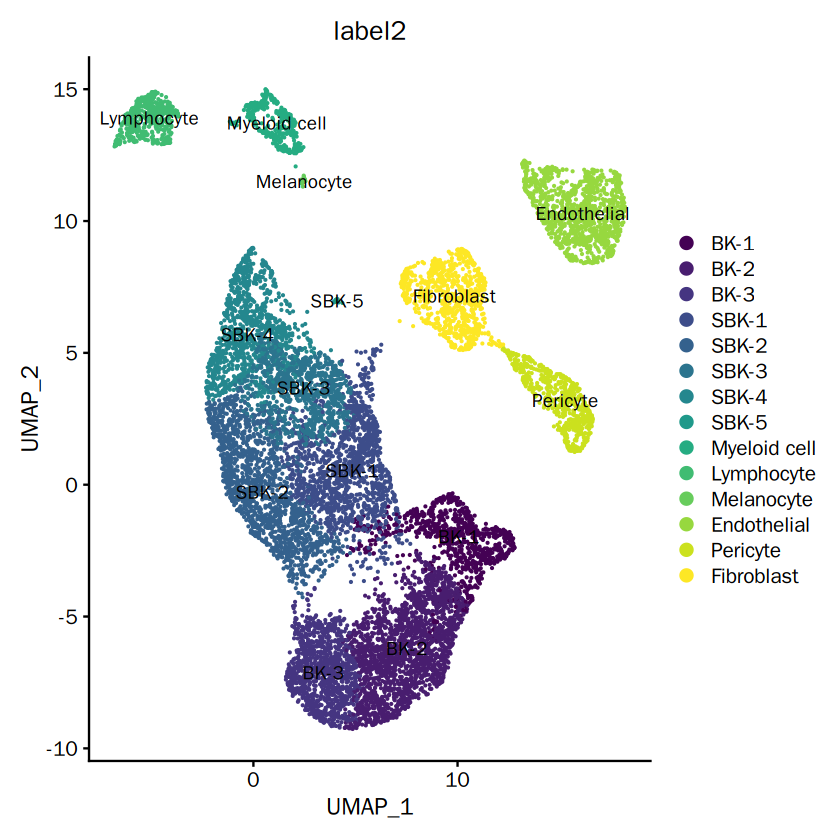

In [12]:
# the annotation is stored in the 'subclass' column of object metadata
DimPlot(ref, group.by = "label2", label = TRUE)

In [13]:
# Convert label2 to character if necessary
ref@meta.data$label2 <- as.character(ref@meta.data$label2)

# Combine BK-1, BK-2, BK-3 into "BK-1-3"
ref@meta.data$label2[ref@meta.data$label2 %in% c("BK-1", "BK-2", "BK-3")] <- "BK-1-3"

# Combine SBK-1, SBK-2, SBK-3 into "SBK-1-3"
ref@meta.data$label2[ref@meta.data$label2 %in% c("SBK-1", "SBK-2")] <- "SBK-1-2"
# Combine SBK-1, SBK-2, SBK-3 into "SBK-1-3"
ref@meta.data$label2[ref@meta.data$label2 %in% c("SBK-3", "SBK-4")] <- "SBK-3-4"



In [14]:
ref@meta.data$label3 <- as.character(ref@meta.data$label3)
ref@meta.data$label3[ref@meta.data$label3 %in% c("BK-1", "BK-2", "BK-3")] <- "BK-1-3"
ref@meta.data$label3[ref@meta.data$label3 %in% c("SBK-1", "SBK-2")] <- "SBK-1-2"
ref@meta.data$label3[ref@meta.data$label3 %in% c("SBK-3", "SBK-4")] <- "SBK-3-4"

In [15]:
ref@meta.data$label3[ref@meta.data$label3 %in% c("Superficial FIB", "FRC-like FIB", "Inf universal FIB", "Universal FIB")] <- "Fibroblast"

In [16]:
anchors <- FindTransferAnchors(reference = ref, query = object, normalization.method="LogNormalize")
predictions.assay <- TransferData(anchorset = anchors, refdata = ref$label3, prediction.assay = TRUE,
    weight.reduction = object[["pca"]], dims = 1:30)
object[["predictions"]] <- predictions.assay

Performing PCA on the provided reference using 1728 features as input.

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 4399 anchors

Finding neighborhoods

Finding anchors

	Found 3080 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
“Layer counts isn't present in the assay object; returning NULL”


In [50]:
row_order <- c("BK-1-3", "SBK-1-2", "SBK-3-4", "SBK-5", "Th17", "CD4em", "CD4n", "CD8/NK", "pDC","Mast cell", "mDC", "cDC2-2", "cDC2-1",  "Macrophage", "Fibroblast", "Endothelial", "Pericyte")

In [51]:
col_order <- c('Basal KC','Differentiating KC','Terminally diff KC','Pustular KC', 'Lymphoid-CCL19+ niche','pDC',"Mast cell", 'a/mDC',  'Inflammatory Fib/Mac','Fibroblast', 'Endo/Peri')

In [19]:
data_matrix <- object@assays[["predictions"]]@data
data_matrix <- data_matrix[rownames(data_matrix) != "max", ]

cell_types <- object$label
cell_ids <- colnames(data_matrix)
cell_ids_by_type <- split(cell_ids, cell_types[cell_ids])

sum_values <- matrix(NA, nrow = nrow(data_matrix), ncol = length(unique(cell_types)))
colnames(sum_values) <- unique(cell_types)
for (cell_type in unique(cell_types)) {
  selected_columns <- cell_ids_by_type[[cell_type]]
  sum_values[, cell_type] <- rowSums(data_matrix[, selected_columns, drop = FALSE])
}
rownames(sum_values) <- rownames(data_matrix)

min_max_standarize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

data <- t(apply(sum_values, 1, min_max_standarize))
data_df <- as.data.frame(data)
colnames(data_df) <- colnames(sum_values)
rownames(data_df) <- rownames(sum_values)

In [20]:
colnames(sum_values)

[1] "Pustular KC"           "Terminally diff KC"    "Mast cell"            
 [4] "Lymphoid-CCL19+ niche" "Basal KC"              "Inflammatory Fib/Mac" 
 [7] "Differentiating KC"    "Fibroblast"            "pDC"                  
[10] "a/mDC"                 "Endo/Peri"

In [21]:
rownames(sum_values)

[1] "SBK-1-2"          "cDC2-1"           "SBK-3-4"          "Fibroblast"      
 [5] "Th17"             "BK-1-3"           "CD4em"            "mDC"             
 [9] "CD8/NK"           "Endothelial"      "CD4n"             "Macrophage"      
[13] "cDC2-2"           "pDC"              "Schwann-like FIB" "SBK-5"           
[17] "Pericyte"         "Mast cell"        "Melanocyte"

In [52]:
data_df <- data_df[row_order, col_order, drop=FALSE]

In [26]:
library(pheatmap)
library(viridis)

필요한 패키지를 로딩중입니다: viridisLite



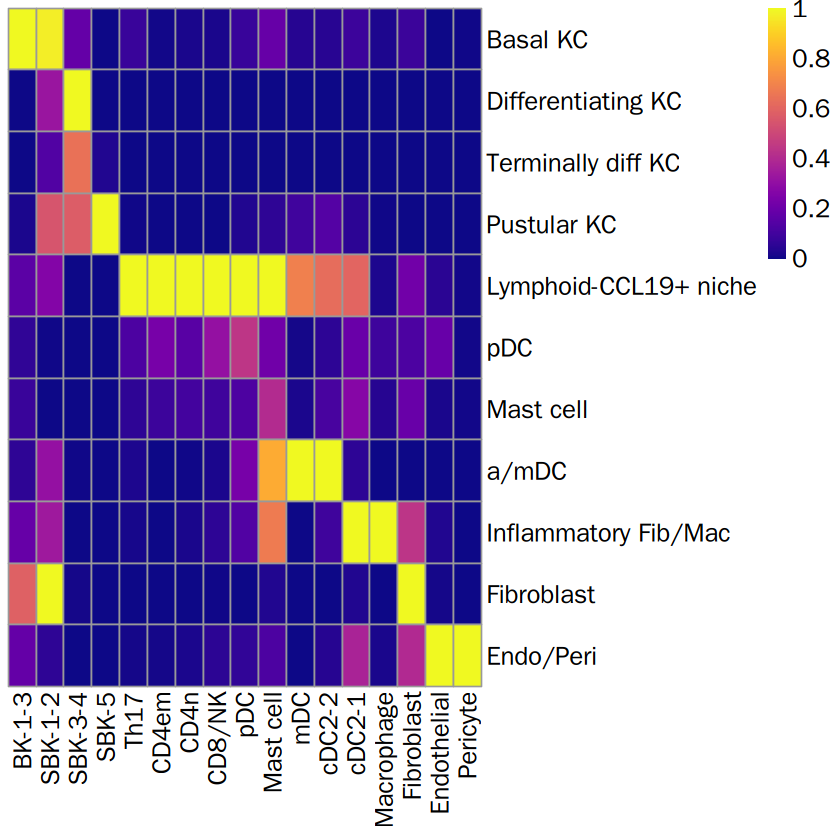

In [53]:
pheatmap(t(data_df), 
                   color = plasma(300), 
                   cluster_rows = FALSE, 
                   cluster_cols = FALSE,
                   show_rownames = TRUE,          
                   show_colnames = TRUE,
                   fontsize = 15,   
                   angle_col = "90")

In [39]:
library(svglite)

In [54]:
ht <- pheatmap(
  t(data_df),
  color         = plasma(300),
  cluster_rows  = FALSE,
  cluster_cols  = FALSE,
  show_rownames = TRUE,
  show_colnames = TRUE,
  fontsize_row  = 15,
  fontsize_col  = 13, 
  angle_col     = 90,     
  silent        = TRUE    
)

ggsave(
  filename = "./figure3/250531_correlation_fine_heatmap2_fibroblastbulk-3.svg",
  plot     = ht,   
  device   = "svg",       
  width    = 7,           
  height   = 4
)